# Анализ качества белого вина
Исходный датасет состоит из двух: один для белого вина, другой для красного. Поскольку первый датасет значительно превосходит второй, было решено использовать именно его. Данный датасет представляет собой результат анализа экспертами различных сортов белого португальского вина Vinho Verde. На вход подаются объективные физико-химические характеристики вина, на выходе - медиана из оценок качества вина как минимум тремя различными экспертами. Качество вина представляет собой целое значение в диапазоне 0 (ужасное) - 10 (превосходное). Мы в свою очередь будем рассматривать задачу классификации вина на одиннадцать классов (по его качеству) на основании его характеристик. В этой задаче мы попытаемся предсказать, к какому из одиннадцати классов данное вино принадлежит по его физико-химическим свойствам.

**Input variables (based on physicochemical tests):**
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

**Output variable (based on sensory data):**
12. quality (score between 0 and 10)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [2]:
data = pd.read_csv('data/winequality-white.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [5]:
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [8]:
print(data.shape)
print(data.columns)

(4898, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=4898, step=1)

In [10]:
data.at[3, "fixed acidity"]

7.2

In [11]:
data["alcohol"]

0        8.800000
1        9.500000
2       10.100000
3        9.900000
4        9.900000
5       10.100000
6        9.600000
7        8.800000
8        9.500000
9       11.000000
10      12.000000
11       9.700000
12      10.800000
13      12.400000
14       9.700000
15      11.400000
16       9.600000
17      12.800000
18      11.300000
19       9.500000
20      12.800000
21      11.000000
22      10.500000
23       9.300000
24      10.000000
25      10.400000
26      10.000000
27      10.500000
28      11.600000
29      12.300000
          ...    
4868    10.800000
4869     9.800000
4870    11.450000
4871    12.050000
4872     9.700000
4873    11.900000
4874    10.000000
4875     9.700000
4876    11.600000
4877     8.800000
4878     9.500000
4879     9.533333
4880     9.533333
4881     9.400000
4882    10.700000
4883    11.500000
4884     9.600000
4885     9.550000
4886    12.150000
4887    13.000000
4888     9.200000
4889     9.400000
4890    11.800000
4891    10.600000
4892     9

In [12]:
data["alcohol"][10]

12.0

In [13]:
data["quality"].dtype.name

'int64'

Построим таблицу, содержащую статистическую информацию о распределении данных по каждому признаку и единственному выходу (quality).

*mean - медиана, std - среднеквадратическое отклонение*

In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Построим теперь диаграмму матрицы рассеивания (scatter matrix).

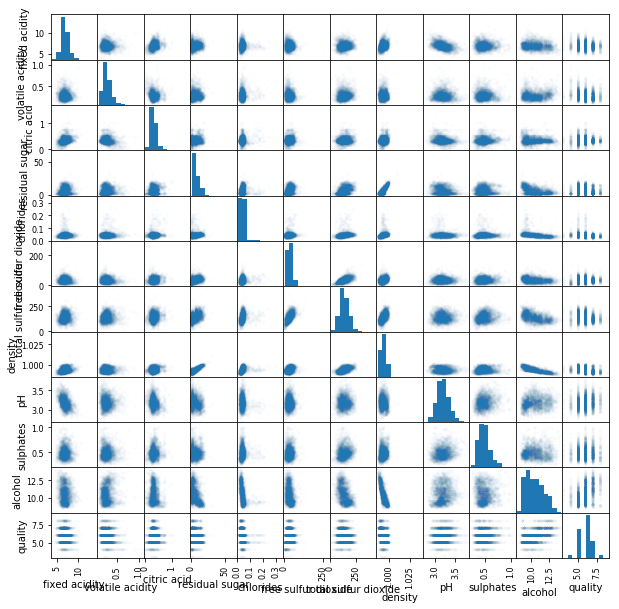

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Построим таблицу, описывающую попарную корреляцию между признаками и выходом (quality).

In [16]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [17]:
corrs = data.corr().abs()
np.fill_diagonal(corrs.values, -2)
corrs.max()


fixed acidity           0.425858
volatile acidity        0.194723
citric acid             0.289181
residual sugar          0.838966
chlorides               0.360189
free sulfur dioxide     0.615501
total sulfur dioxide    0.615501
density                 0.838966
pH                      0.425858
sulphates               0.155951
alcohol                 0.780138
quality                 0.435575
dtype: float64

Видим, что наиболее сильная зависимость есть между параметрами "residual sugar" и "density", "density" и "alcohol" (выше 0.67).
Построим графики зависимостей.

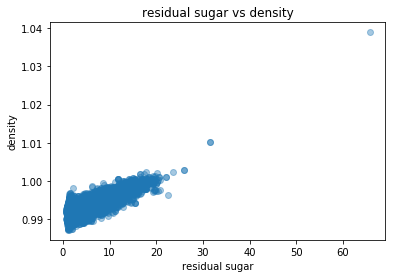

In [18]:
plt.plot(data['residual sugar'], data['density'], 'o', alpha = 0.40)
plt.xlabel('residual sugar')
plt.ylabel('density')
plt.title('residual sugar vs density')
pass

Из графика видно, что чем меньше в вине остаточного сахара, тем меньше и плотность, что подтверждает предыдущее утверждение.
Аналогично поступим с "density" и "alcohol", зависимость должна получиться обратная.

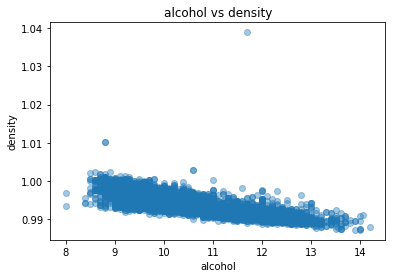

In [19]:
plt.plot(data['alcohol'], data['density'], 'o', alpha = 0.40)
plt.xlabel('alcohol')
plt.ylabel('density')
plt.title('alcohol vs density')
pass

In [20]:
k = 0
for q in data["quality"]:
    if q == 8:
        k = k+1
print(k, k / data["quality"].count())

175 0.03572886892609228


Как видим, вин с оценкой 8 крайне мало - всего 3,5 процента от общей выборки.

Из таблицы корреляции также видно, что наиболее существенное влияние(на фоне других параметров) на качество оказывает параметр "alcohol". Построим график зависимости между качеством, уровнем алкоголя и хлоридов: 

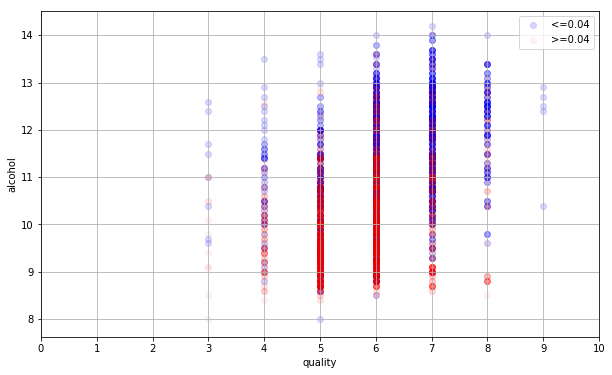

In [21]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['chlorides'] <= 0.04]['quality'],
            data[data['chlorides'] <= 0.04]['alcohol'],
            alpha = 0.15,
            label = '<=0.04',
            color = 'b')

plt.scatter(data[data['chlorides'] >= 0.04]['quality'],
            data[data['chlorides'] >= 0.04]['alcohol'],
            alpha = 0.05,
            label = '>=0.04',
            color = 'r')

plt.xlabel('quality')
plt.xticks(range(11))
plt.xlim(0, 10)
plt.ylabel('alcohol')
plt.legend()
plt.grid()

Видим, что среди наиболее качественных вин действительно больше тех, чей уровень алкоголя выше (но только до определённого предела). При этом в более крепких напитках хлоридов меньше (хотя и не так значительно).

In [22]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

# Подготовка данных

In [23]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Выделим категориальные и числовые характеристики. В качестве категориальной характеристики будет выступать 'quality'.

In [24]:
categorical_columns = ['quality']
numerical_columns = [c for c in data.columns if c != 'quality']
print(categorical_columns)
print(numerical_columns)

['quality']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Видим, что все признаки, кроме quality, числовые, значит, векторизацию для них применять не нужно.
Проверим, есть ли пропущенные значения (по описанию датасета их быть не должно).

In [25]:
data.count(axis = 0)

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

Так и есть, пропущенные значения отсутствуют.

In [26]:
data_nonbinary = data['quality']
data_nonbinary.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Теперь нормализуем числовые характеристики:

In [27]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0)) / data_numerical.std(axis = 0)

In [28]:
data_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,2.653755e-14,-1.053431e-14,5.344610e-14,-2.538326e-15,-1.419036e-15,6.210721e-18,-1.387439e-16,2.148461e-12,1.316599e-14,-1.280696e-14,-2.846868e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.619982e+00,-1.966784e+00,-2.761461e+00,-1.141827e+00,-1.683102e+00,-1.958477e+00,-3.043919e+00,-2.312802e+00,-3.101091e+00,-2.364468e+00,-2.043089e+00
25%,-6.574340e-01,-6.770318e-01,-5.304215e-01,-9.249530e-01,-4.472890e-01,-7.237012e-01,-7.144009e-01,-7.706280e-01,-6.507699e-01,-6.996389e-01,-8.241915e-01
50%,-6.492444e-02,-1.809733e-01,-1.172660e-01,-2.348977e-01,-1.268931e-01,-7.691388e-02,-1.026084e-01,-9.608339e-02,-5.474574e-02,-1.739035e-01,-9.285319e-02
75%,5.275851e-01,4.142970e-01,4.611517e-01,6.917479e-01,1.935028e-01,6.286722e-01,6.738976e-01,6.929749e-01,6.075033e-01,5.270772e-01,7.197450e-01
max,8.704217e+00,8.152811e+00,1.095530e+01,1.171292e+01,1.374167e+01,1.491679e+01,7.097720e+00,1.502976e+01,4.183648e+00,5.171074e+00,2.995020e+00


Объединим в одну таблицу:

In [29]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

(4898, 12)


Отбрасываем столбец quality, так как будем его предсказывать:

In [30]:
X = data.drop(('quality'), axis = 1)
y = data['quality']
feature_names = X.columns
type(feature_names)

pandas.core.indexes.base.Index

In [31]:
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [32]:
print(X.shape)
print(y.shape)
N, d = X.shape

(4898, 11)
(4898,)


In [33]:
type(X)

pandas.core.frame.DataFrame

In [34]:
type(y)

pandas.core.series.Series

Разобьём исходный датасет на две части в соотношении 30/70 - тестовую и обучающую выборки.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3428 1470


In [36]:
print((N_train + N_test) == data.count())

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool


# kNN

Произведём обучение классификатора и выполним классификацию при этом варьируя число соседей в методе от 1 до 15: 1, 3, 5, 10, 15. Посчитаем ошибки двумя способами, построим **матрицу ошибок** (confusion matrix) для каждого случая. (*Матрица ошибок - это такая матрица M, размер которой определяется количеством различных классов, а элемент M[i,j] - число объектов, которые относятся к классу i, но классификатор отнес их к классу j. Даёт наглядное представление о результате работы классификатора*).
Как-то специально классификатор мы настривать не будем, и будем использовать значения по умолчанию:

In [37]:
from sklearn.neighbors import KNeighborsClassifier

print(KNeighborsClassifier(n_neighbors = 5))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


Опишем, что значат эти параметры:
1. **algorithm = auto**. Это означает, что подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки. А вообще бывают следующие способы:"brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей.
2. **leaf_size=30**. Здесь мы выбрали порог переключения на полный перебор равным 30 (в случае выбора BallTree или KDTree для нахождения соседей).
3. **metric='minkowski'**. Для нахождения расстояния между соседями будет использоваться метрика Минковского. При использовании большинства метрик признаки нужно масштабировать (что мы и сделали ранее в подготовке данных для kNN).
4. **n_neighbors=5**. Число соседей. Здесь оно задаётся равным 5 (просто для примера).
5. **weights='uniform'**. Это означает, что веса всех соседей равны, а не обратно пропорциональны расстоянию, например (если бы мы выбрали "distance").

In [38]:
# зададим количество соседей равным 1, 3, 5, 10, 15
for n in [1, 3, 5, 10, 15]:
    # обучение классификатора при заданном n
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    # само предсказание
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)
    
    # выведем ошибку при текущем n двумя способами
    print("Количество соседей: ", n)
    print("Ошибка на обучающей выборке: ", err_train, 1 - knn.score(X_train, y_train))
    print("Ошибка на тестовой выборке: ", err_test, 1 - knn.score(X_test, y_test))
    # построим confusion matrix 
    print("Матрица ошибок (confusion matrix): \n", confusion_matrix(y_test, y_test_predict))
    print("\n ----------------------------- \n")

Количество соседей:  1
Ошибка на обучающей выборке:  0.0 0.0
Ошибка на тестовой выборке:  0.38639455782312926 0.38639455782312926
Матрица ошибок (confusion matrix): 
 [[  1   0   3   3   0   0   0]
 [  1  10  17  10   1   0   1]
 [  0  16 279 116  15   0   0]
 [  1  18 144 418  78   9   0]
 [  1   2  16  76 172  13   0]
 [  0   0   2  13  12  22   0]
 [  0   0   0   0   0   0   0]]

 ----------------------------- 

Количество соседей:  3
Ошибка на обучающей выборке:  0.2278296382730455 0.22782963827304548
Ошибка на тестовой выборке:  0.44081632653061226 0.4408163265306122
Матрица ошибок (confusion matrix): 
 [[  1   0   2   4   0   0]
 [  1  12  18   8   1   0]
 [  2  23 262 121  16   2]
 [  2  23 169 409  63   2]
 [  0   3  32 107 129   9]
 [  0   1   3  20  16   9]]

 ----------------------------- 

Количество соседей:  5
Ошибка на обучающей выборке:  0.308634772462077 0.30863477246207704
Ошибка на тестовой выборке:  0.4523809523809524 0.45238095238095233
Матрица ошибок (confusion ma

Как видим, наименьшая ошибка у нас получается в случае одного соседа - 38%, в дальнейшем при увеличении числа соседей до 15 она по большей части растёт и достигает 44%-45% при 10-15 соседях. Произведём подбор параметров (в данном случае это количество соседей) и проверим, в самом ли деле наилучшим образом работает вариант метода ближайших соседей с ровно одним соседом.

## Подбор параметров

In [39]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.3923570595099183 1


In [40]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.38639455782312926


Победителем вышел алгоритм 1NN. Ошибка на обучающей выборке, очевидно, равна нулю, а на тестовой 38.6%. Что же, возможно, впоследствии удастся её понизить в полтора-два раза, используя другие методы машинного обучения.

# Упрощённый случай. Подготовка данных + kNN

Упростим себе задачу и будем делить все вина в зависимости от качества на хорошие ("good") и плохие ("bad"). Если качество вина лежит в диапазоне [3, 6.5], такое вино назовём плохим, если же оно принадлежит диапазону [6.5, 9], то такое вино считаем хорошим.

In [41]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
y_simplified = pd.cut(y, bins = bins, labels = group_names)
y_simplified.describe()

count     4893
unique       2
top        bad
freq      3838
Name: quality, dtype: object

Теперь "бинаризуем" качество вина, иначе говоря, good теперь будет соответствовать 1, а bad - 0.

In [42]:
label_quality = LabelEncoder()
y_simplified  = label_quality.fit_transform(y_simplified.astype(str))

In [43]:
X_train, X_test, y_simplified_train, y_simplified_test = train_test_split(X, y_simplified, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3428 1470


In [44]:
# зададим количество соседей равным 1, 3, 5, 10, 15
for n in [1, 3, 5, 10, 15]:
    # обучение классификатора при заданном n
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_simplified_train)
    # само предсказание
    y_simplified_train_predict = knn.predict(X_train)
    y_simplified_test_predict = knn.predict(X_test)

    err_train = np.mean(y_simplified_train != y_simplified_train_predict)
    err_test  = np.mean(y_simplified_test  != y_simplified_test_predict)
    
    # выведем ошибку при текущем n двумя способами
    print("Количество соседей: ", n)
    print("Ошибка на обучающей выборке: ", err_train, 1 - knn.score(X_train, y_simplified_train))
    print("Ошибка на тестовой выборке: ", err_test, 1 - knn.score(X_test, y_simplified_test))
    # построим confusion matrix 
    print("Матрица ошибок (confusion matrix): \n", confusion_matrix(y_simplified_test, y_simplified_test_predict))
    print("\n ----------------------------- \n")

Количество соседей:  1
Ошибка на обучающей выборке:  0.0 0.0
Ошибка на тестовой выборке:  0.145578231292517 0.145578231292517
Матрица ошибок (confusion matrix): 
 [[1037  103    1]
 [ 110  219    0]
 [   0    0    0]]

 ----------------------------- 

Количество соседей:  3
Ошибка на обучающей выборке:  0.09072345390898483 0.09072345390898484
Ошибка на тестовой выборке:  0.16666666666666666 0.16666666666666663
Матрица ошибок (confusion matrix): 
 [[1044   97]
 [ 148  181]]

 ----------------------------- 

Количество соседей:  5
Ошибка на обучающей выборке:  0.12485414235705951 0.1248541423570595
Ошибка на тестовой выборке:  0.16598639455782313 0.16598639455782316
Матрица ошибок (confusion matrix): 
 [[1047   94]
 [ 150  179]]

 ----------------------------- 

Количество соседей:  10
Ошибка на обучающей выборке:  0.14819136522753792 0.14819136522753795
Ошибка на тестовой выборке:  0.17959183673469387 0.17959183673469392
Матрица ошибок (confusion matrix): 
 [[1074   67]
 [ 197  132]]

 

Снова попробуем подобрать параметры

In [45]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_simplified_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1677362893815636 1


In [46]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_simplified_train)

err_train = np.mean(y_simplified_train != knn.predict(X_train))
err_test  = np.mean(y_simplified_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.145578231292517


Как видим, в упрощённой задачке классификации вина на хорошее и плохое можно достичь ошибки в 14.5%, что почти в три раза лучше, чем в исходной задаче. Результат очевидный, поскольку классификация получилась довольно грубой. С другой стороны, на практике вряд ли потребуется точно предсказать медиану из оценок экспертов по десятибалльной шкале, скорее всего, потребуется просто разделить вино на пару-тройку классов по среднему качеству.

# MLP

Будем предсказывать оценку качества вина на основании его характеристик.

In [47]:
X = data.drop(('quality'), axis = 1)
y = data['quality']
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


Разбиваем выборку на обучающую и тестовую. 33% идет в тестовую выборку.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

In [49]:
from sklearn.neural_network import MLPClassifier

Обучаем MLP классификатор. Рассматриваем нейронную сеть с одним скрытым слоем с 11 нейронами (для начала возьмём по числу признаков).

In [50]:
mlp_model = MLPClassifier(hidden_layer_sizes = (11,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверяем качество классификатора. Вычисляем ошибки на обучающей и тестовой выборках:

In [51]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.409935995123438 0.45330859616573904


Поскольку ошибка на обучающей выборке меньше ошибки на тестовой выборке, имеет место переобучение. Увеличим число нейронов вдвое и посмотрим, изменились ли ошибки на обучающей/тестовой выборках:

In [52]:
mlp_model = MLPClassifier(hidden_layer_sizes = (22,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(22,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [53]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.3794574824748552 0.46876932591218307


Видим, что ошибка на тестовой выборке немного увеличилась, а ошибка на обучающей выборке стала ещё меньше. Переобучение только усилилось. Для интереса, посмотрим, что будет при 55 нейронах:

In [54]:
mlp_model = MLPClassifier(hidden_layer_sizes = (55,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(55,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [55]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.35751295336787564 0.46072974644403214


Снова получаем тот же результат: ошибка на обучающей выборке уменьшилась, а на тестовой - осталась примерно на том же уровне. Переобучение только прогрессирует, дальнейшее увеличение числа нейронов, видимо, смысла большого не имеет. Остановимся на 11 нейронах.

Попробуем теперь добавить ещё один скрытый слой. Рассматриваем нейронную сеть с двумя скрытыми слоями. Первый слой содержит 11 нейронов, второй - 3.

In [56]:
mlp_model = MLPClassifier(hidden_layer_sizes = (11, 3), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [57]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.38768668088997255 0.44341372912801486


Видим, что ошибка на тестовой выборке стала меньше по сравнению со всеми предыдущими "опытами", в то же время переобучение всё так же присутствует. Попробуем 5 нейронов во втором скрытом слое:

In [58]:
mlp_model = MLPClassifier(hidden_layer_sizes = (11, 5), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [59]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.40505943309966475 0.4366110080395795


Ошибка на тестовой выборке ещё немного "улучшилась", а переобучение уменьшилось. Попробуем 7 нейронов во втором скрытом слое:

In [60]:
mlp_model = MLPClassifier(hidden_layer_sizes = (11, 7), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [61]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.4026211520877781 0.47186147186147187


Ошибка на тестовой выборке только ухудшилась, переобучение вновь стало значительным. Остановимся на варианте с 11 нейронами в первом скрытом слое, и 5 во втором, поскольку он показал наилучший результат на тестовой выборке и наименьшее переобучение.

### Подберем оптимальное значение параметра регуляризации alpha

In [62]:
alpha_arr = np.logspace(-7, 1, 7)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (11,5), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки от параметра alpha:

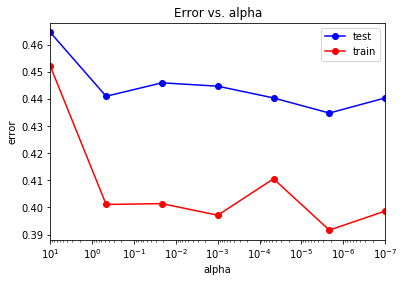

In [63]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [64]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.39164888753428834 0.43475572047000616


Оптимальное значение alpha:

In [65]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[2.15443469e-06]


Повторим обучение при найденном оптимальном значении параметра alpha:

In [66]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (11,5),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.39164888753428834
0.43475572047000616


Ошибка уменьшилась, хоть и не слишком значительно: значение alpha, используемое по-умолчанию, оказалось достаточно близким к найденному оптимальному значению.

### Поиск оптимального количества нейронов

Проанализируем оптимальное количество нейронов для MLP классификатора с одним скрытым слоем и найденным ранее значение параметра alpha.

In [67]:
neurons_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 20, 22, 30, 40, 50, 60, 70, 80, 90, 100)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


Построим график зависимости ошибки от количества нейронов

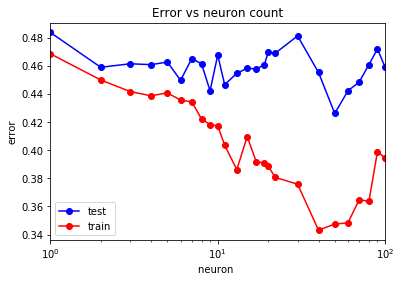

In [68]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.xticks
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

In [69]:
min_test_error = test_err[0]
min_index = 0
for i in range(len(neurons_arr)):
    if test_err[i] < min_test_error:
        min_test_error = test_err[i]
        min_index = i
print("Минимальная ошибка на тестовой выборке ", min_test_error, " была получена при ", neurons_arr[min_index], " нейронах")

Минимальная ошибка на тестовой выборке  0.4260977118119975  была получена при  50  нейронах


По графику видим, что наилучшая ошибка на тестовой выборке при использовании однослойной нейронной сети с параметром alpha  равным найденному ранее оптимальному значению достигается при 50 нейронах. Наибольшая разница между ошибками на обучающей и тестовой выборках достигается при 20-70 нейронах, что говорит о том, что при данном числе нейронов имеет место переобучение.
Наименьшая разница между ошибками на обучающей и тестовой выборках была получена при использовании двуслойной нейронной сети с 11 и 5 нейронами в скрытых слоях. Из этого можно сделать вывод, что проблема переобучения в этой задаче *может быть* частично решена путём увеличения числа слоёв и нейронов. Попробуем проверить это утверждение на нейронной сети с двумя слоями: в первом - 50 нейронов, во втором - будем варьировать.

Проанализируем оптимальное количество нейронов для MLP классификатора с двумя скрытыми слоями: 50 нейронов и произвольное число нейронов во втором скрытом слое.

In [70]:
neurons_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 20, 22, 30, 40, 50, 60, 70, 80, 90, 100)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50, neuron), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки от количества нейронов во втором слое:

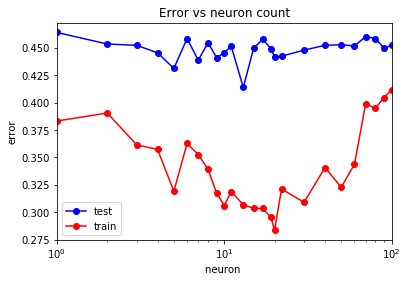

In [71]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

In [72]:
min_test_error = test_err[0]
min_index = 0
for i in range(len(neurons_arr)):
    if test_err[i] < min_test_error:
        min_test_error = test_err[i]
        min_index = i
print("Минимальная ошибка на тестовой выборке ", min_test_error, " была получена при (50, ", neurons_arr[min_index], ") нейронах")

Минимальная ошибка на тестовой выборке  0.4137291280148423  была получена при (50,  13 ) нейронах


Таким образом, данный график подтверждает утверждение, сделанное по предыдущему графику: переобучение в этой задаче действительно можно сильно понизить за счёт увеличения числа слоёв и числа нейронов. Возможно, при этом так же удастся улучшить ошибку на тестовой выборке, что и демонстрирует данный график.

# Random forest

Решим задачу классификации вина по качеству на основании его характеристик при помощи алгоритма Random forest.

Разбиваем данные на обучающую и тестовую выборки. Тестовая выборка содержит 33% данных

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

Проведем обучение Random forest классификатора на тренировочной выборке с параметром n_estimators = 50 (кол-во построенных деревьев).

In [94]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.00030478512648582747 0.3450834879406308


Ошибка на тестовой выборке улучшилась по сравнению со всеми предыдущими методами. Наблюдается также значительное переобучение.

Построим график зависимости ошибки (на обучающей и тестовой выборке, oob) от количества используемых деревьев.

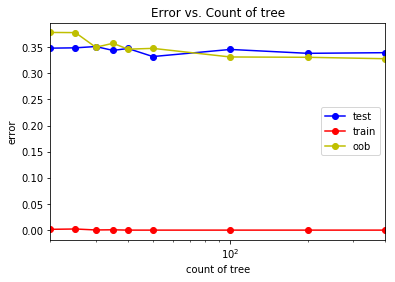

In [89]:
tree_arr = (20, 25, 30, 35, 40, 50, 100, 200, 400)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(tree, oob_score = True)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    oob_err.append(1 - rf.oob_score_) 
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.semilogx(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

In [90]:
min_test_error = test_err[0]
min_index = 0
for i in range(len(tree_arr)):
    if test_err[i] < min_test_error:
        min_test_error = test_err[i]
        min_index = i
print("Минимальная ошибка на тестовой выборке ", min_test_error, " была получена при ", tree_arr[min_index], " деревьях")

Минимальная ошибка на тестовой выборке  0.3320964749536178  была получена при  50  деревьях


Таким образом была получена наилучшая ошибка на тестовой выборке по сравнению со всеми предыдущими методами - 0.33, oob ошибка находится на уровне ~0.32 и незначительно снижается с ростом количества деревьев. При этом наблюдается значительное переобучение, избавиться от которого простым увеличением количества деревьев в алгоритме не удаётся.

# Extremely random forest

Проведем обучение Extremely random forest классификатора на тренировочной выборке с параметром n_estimators = 50 (кол-во построенных деревьев).

In [96]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 50)
ert.fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.3370439084724799


Построим график зависимости ошибки (на обучающей и тестовой выборке, oob) от количества используемых деревьев.

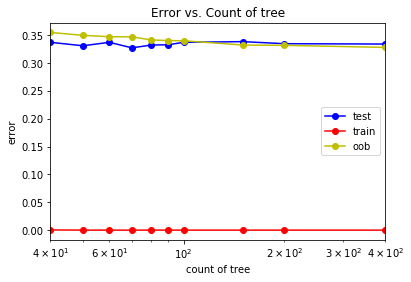

In [101]:
tree_arr = (40, 50, 60, 70, 80, 90, 100, 150, 200, 400)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(tree, bootstrap = True, oob_score = True)
    ert.fit(X_train, y_train)

    y_train_pred = ert.predict(X_train)
    y_test_pred = ert.predict(X_test)
    oob_err.append(1 - ert.oob_score_)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.semilogx(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

In [102]:
min_test_error = test_err[0]
min_index = 0
for i in range(len(tree_arr)):
    if test_err[i] < min_test_error:
        min_test_error = test_err[i]
        min_index = i
print("Минимальная ошибка на тестовой выборке ", min_test_error, " была получена при ", tree_arr[min_index], " деревьях")

Минимальная ошибка на тестовой выборке  0.3271490414347557  была получена при  70  деревьях


Таким образом мы ещё немного улучшили ошибку на тестовой выборке, теперь она стала равной ~0.327, ситуация с oob ошибкой остаётся прежней: она находится на уровне ~0.32 и незначительно снижается с ростом количества деревьев. Наилучшая ошибка наблюдается здесь при немного большем количестве деревьев - 70. При этом наблюдается значительное переобучение, избавиться от которого простым увеличением количества деревьев в алгоритме не удаётся.